<a href="https://colab.research.google.com/github/andreasellw/4343NEUNW/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks 2019: Assignment 1

## Import packages, load data

In [0]:
# import packages
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import imshow
import itertools
from sklearn.metrics import confusion_matrix

In [0]:
# load data
url = 'https://raw.githubusercontent.com/andreasellw/4343NEUNW/master/01_practical-assignment/data/'
train_data = pd.read_csv((url+'train_in.csv'), header=None)
train_labels = pd.read_csv((url+'train_out.csv'), header=None, names=['value'])
test_data = pd.read_csv((url+'test_in.csv'), header=None)
test_labels = pd.read_csv((url+'test_out.csv'), header=None, names=['value'])

## Intial data exploration

In [0]:
# explore given data
train_digit, train_cardinality = np.unique(train_labels, return_counts=True)
test_digit, test_cardinality = np.unique(test_labels, return_counts=True)
print("Training set:",dict(zip(train_digit.astype(int), train_cardinality)))
print("Testing set:",dict(zip(test_digit.astype(int), test_cardinality)))

Training set: {0: 319, 1: 252, 2: 202, 3: 131, 4: 122, 5: 88, 6: 151, 7: 166, 8: 144, 9: 132}
Testing set: {0: 224, 1: 121, 2: 101, 3: 79, 4: 86, 5: 55, 6: 90, 7: 64, 8: 92, 9: 88}


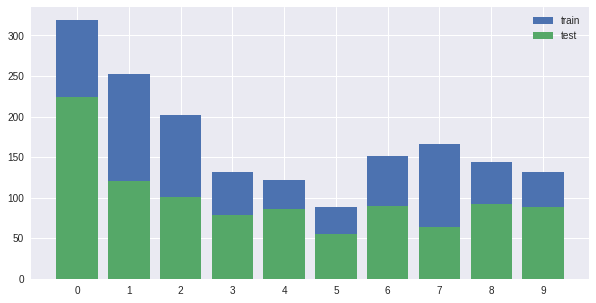

In [0]:
plt.rcParams['figure.figsize'] = [10, 5]
_ = plt.bar(train_digit, train_cardinality)
_ = plt.bar(test_digit, test_cardinality)
_ = plt.xticks(np.arange(10))
_ = plt.legend(("train","test"))

In [0]:
print("train_data.shape, train_labels.shape", train_data.shape, train_labels.shape)
print("train_digit, train_cardinality", train_digit, train_cardinality)
print("test_data.shape, test_labels.shape", test_data.shape, test_labels.shape)
print("test_digit, test_cardinality", test_digit, test_cardinality)

train_data.shape, train_labels.shape (1707, 256) (1707, 1)
train_digit, train_cardinality [0 1 2 3 4 5 6 7 8 9] [319 252 202 131 122  88 151 166 144 132]
test_data.shape, test_labels.shape (1000, 256) (1000, 1)
test_digit, test_cardinality [0 1 2 3 4 5 6 7 8 9] [224 121 101  79  86  55  90  64  92  88]


## Task 1: Analyze distances between images


In [0]:
# find the indices for each different set of labels
label_index_list = []
for i in range(10):
    label_index_list.append(train_labels.index[train_labels['value'] == i].tolist())

In [0]:
# calculate centroids
centroids = []
for d in range(10):
    accum = np.zeros((256,))
    for index in label_index_list[d]:
        accum += train_data.loc[index].values
    centroids.append(accum/len(label_index_list[d]))    

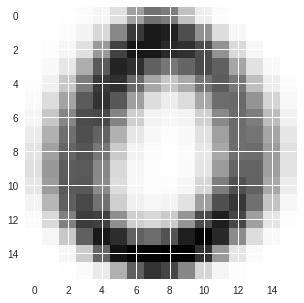

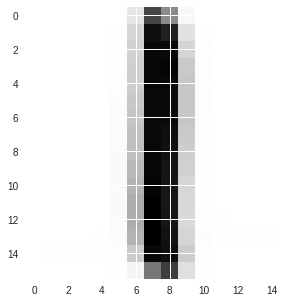

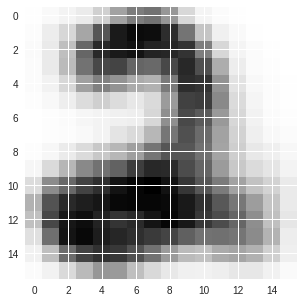

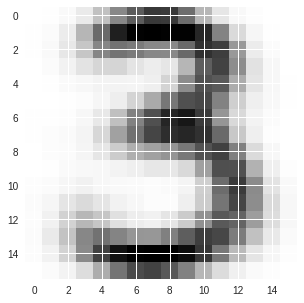

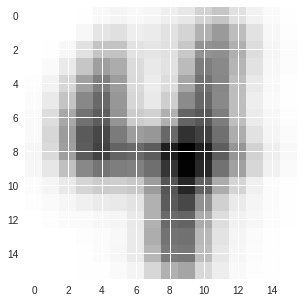

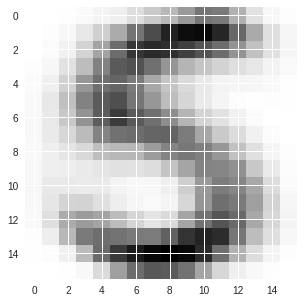

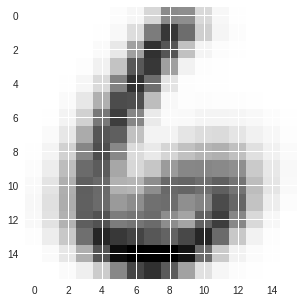

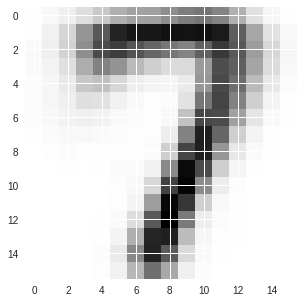

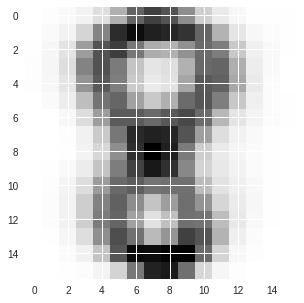

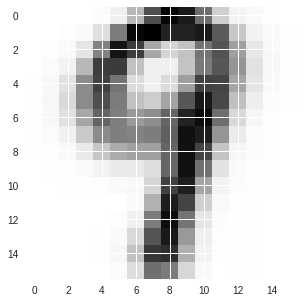

In [0]:
# visualize centroids
for i in range(10):
    a = centroids[i].reshape((16,16))
    plt.figure()
    _ = imshow(a)

i= 0  >> radius:  15.892930339810135
i= 1  >> radius:  9.481363461112087
i= 2  >> radius:  14.168753588743387
i= 3  >> radius:  14.744758949449173
i= 4  >> radius:  14.533522167316484
i= 5  >> radius:  14.451951332761583
i= 6  >> radius:  14.03151781521896
i= 7  >> radius:  14.90896865483367
i= 8  >> radius:  13.705781920637948
i= 9  >> radius:  16.138696018426046

 dst_radius
 [15.89293034  9.48136346 14.16875359 14.74475895 14.53352217 14.45195133
 14.03151782 14.90896865 13.70578192 16.13869602]


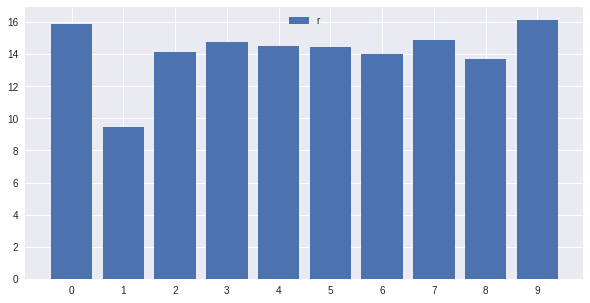

In [0]:
# calculate radius
dst_radius = np.zeros(10)
for i in range(10):
    c = centroids[i]
    for index in label_index_list[i]:
        e_dst = np.linalg.norm(c - train_data.iloc[index])
        if dst_radius[i] < e_dst:
          dst_radius[i] = e_dst  
    print("i=",i," >> radius: ", dst_radius[i,])
print("\n dst_radius\n", dst_radius)
# print("\n dst_radius\n", dict(zip(train_digit, dst_radius)))

plt.rcParams['figure.figsize'] = [10, 5]
_ = plt.bar(train_digit, dst_radius)
_ = plt.xticks(np.arange(10))
_ = plt.legend("radius")
plt.show()

i= 0  >> dst between the centers:  {0: 0.0, 1: 14.44960796590658, 2: 9.334555870229641, 3: 9.143733671882783, 4: 10.769844437633486, 5: 7.519296259597183, 6: 8.154443125778972, 7: 11.864555054634078, 8: 9.90790173732039, 9: 11.488874937417041}


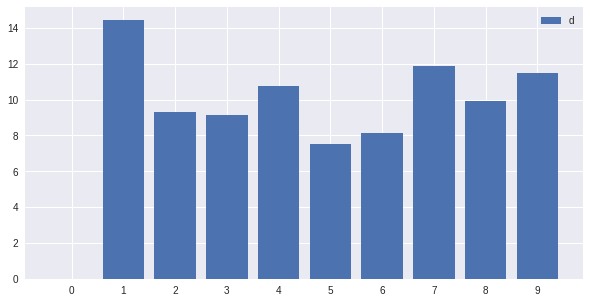

i= 1  >> dst between the centers:  {0: 14.44960796590658, 1: 0.0, 2: 10.125322577096668, 3: 11.73323290183107, 4: 10.173786431281785, 5: 11.118800407467436, 6: 10.614700366283566, 7: 10.743153673524732, 8: 10.086776773038181, 9: 9.932093699343712}


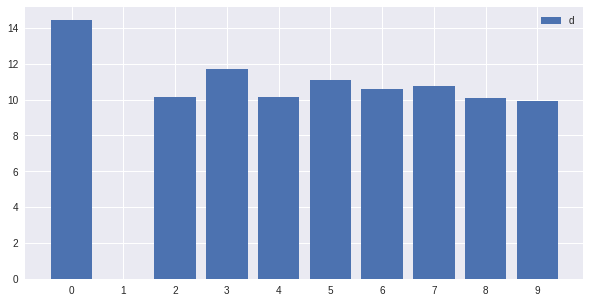

i= 2  >> dst between the centers:  {0: 9.334555870229641, 1: 10.125322577096668, 2: 0.0, 3: 8.17828488564782, 4: 7.932541482770051, 5: 7.906796320949824, 6: 7.33180753932081, 7: 8.872531069307183, 8: 7.077516177863561, 9: 8.88774785200019}


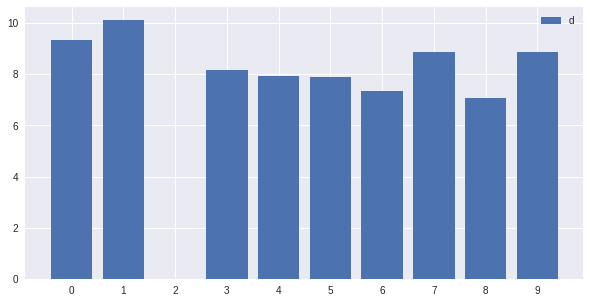

i= 3  >> dst between the centers:  {0: 9.143733671882783, 1: 11.73323290183107, 2: 8.17828488564782, 3: 0.0, 4: 9.087607799539475, 5: 6.118750020921418, 6: 9.302064730092098, 7: 8.922400934698304, 8: 7.020424894700361, 9: 8.354350120111869}


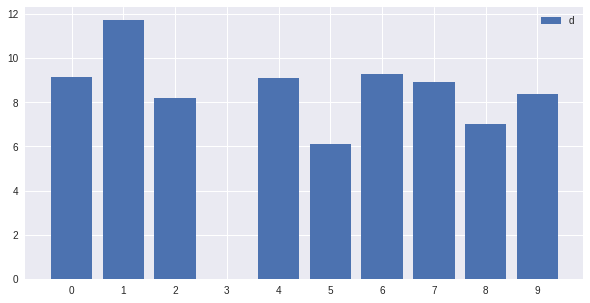

i= 4  >> dst between the centers:  {0: 10.769844437633486, 1: 10.173786431281785, 2: 7.932541482770051, 3: 9.087607799539475, 4: 0.0, 5: 8.001517414291122, 6: 8.78223264756089, 7: 7.583012282564445, 8: 7.380908991053922, 9: 6.0104079308959975}


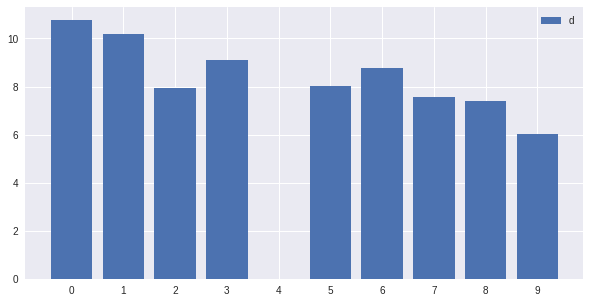

i= 5  >> dst between the centers:  {0: 7.519296259597183, 1: 11.118800407467436, 2: 7.906796320949824, 3: 6.118750020921418, 4: 8.001517414291122, 5: 0.0, 6: 6.698691718889528, 7: 9.211954024577228, 8: 6.967386475240774, 9: 8.258538068421224}


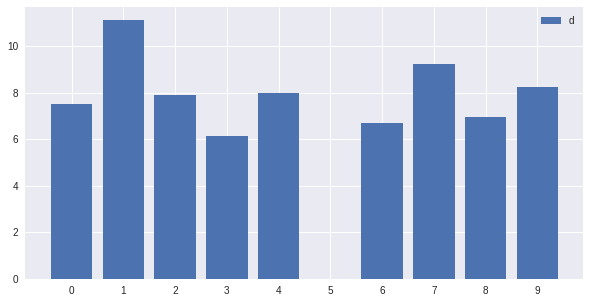

i= 6  >> dst between the centers:  {0: 8.154443125778972, 1: 10.614700366283566, 2: 7.33180753932081, 3: 9.302064730092098, 4: 8.78223264756089, 5: 6.698691718889528, 6: 0.0, 7: 10.888237398418989, 8: 8.587222275506706, 9: 10.440003518840683}


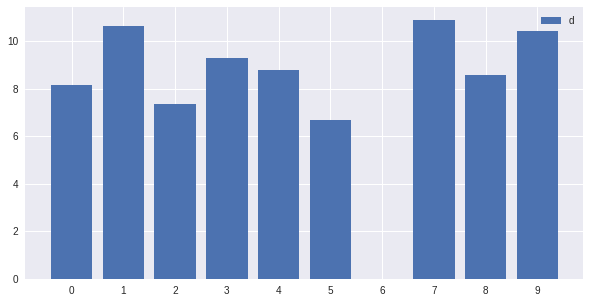

i= 7  >> dst between the centers:  {0: 11.864555054634078, 1: 10.743153673524732, 2: 8.872531069307183, 3: 8.922400934698304, 4: 7.583012282564445, 5: 9.211954024577228, 6: 10.888237398418989, 7: 0.0, 8: 8.467785300988439, 9: 5.426474119055888}


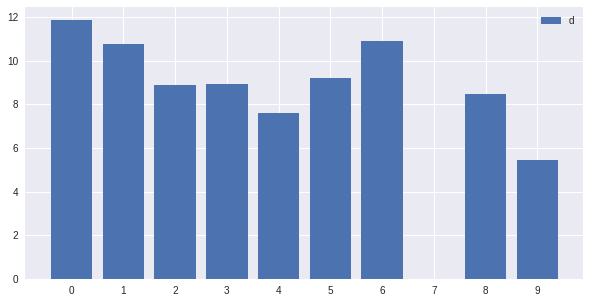

i= 8  >> dst between the centers:  {0: 9.90790173732039, 1: 10.086776773038181, 2: 7.077516177863561, 3: 7.020424894700361, 4: 7.380908991053922, 5: 6.967386475240774, 6: 8.587222275506706, 7: 8.467785300988439, 8: 0.0, 9: 6.40116586858544}


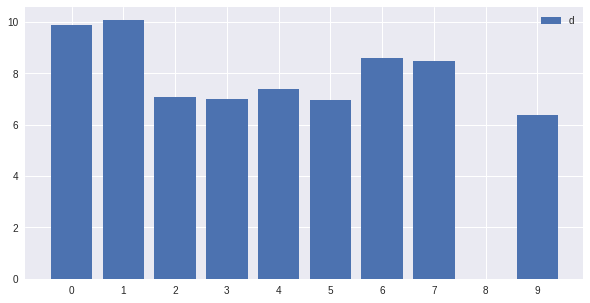

i= 9  >> dst between the centers:  {0: 11.488874937417041, 1: 9.932093699343712, 2: 8.88774785200019, 3: 8.354350120111869, 4: 6.0104079308959975, 5: 8.258538068421224, 6: 10.440003518840683, 7: 5.426474119055888, 8: 6.40116586858544, 9: 0.0}


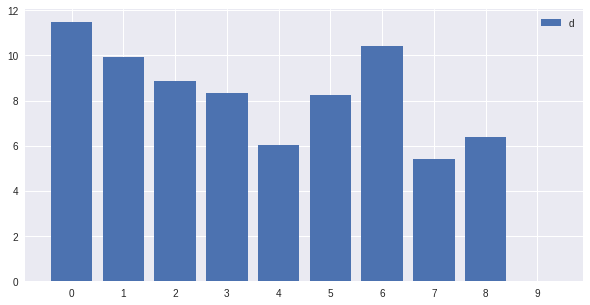

In [0]:
# calculate distances between the centers of the centroids
dst_centroids = np.zeros((10,10))
for i in range(10):
    c = centroids[i]
    for index in range(10):
        e_dst = np.linalg.norm(c - centroids[index])
        dst_centroids[i][index] = e_dst
    print("i=",i," >> dst between the centers: ", dict(zip(train_digit, dst_centroids[i,])))
    plt.rcParams['figure.figsize'] = [10, 5]
    _ = plt.bar(train_digit, dst_centroids[i,])
    _ = plt.xticks(np.arange(10))
    _ = plt.legend("dst between the centers")
    plt.show()
# print("\n dst_centroids\n", dst_centroids)
plt.show()

## Task 2: Implement and evaluate the simplest classiﬁer


 train:
 [[271   0   0   0   2   4  36   0   6   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  3   0 167   9   9   1   3   4   6   0]
 [  0   0   2 120   1   3   0   1   3   1]
 [  0   8   1   0  95   0   3   0   0  15]
 [  3   0   2   3   4  67   3   1   2   3]
 [ 10   4   5   0   2   0 129   0   1   0]
 [  0   4   0   0   2   2   0 140   1  17]
 [  1   2   1  10   2   3   1   0 121   3]
 [  0   3   0   1  10   0   0   6   0 112]]

 test:
 [[178   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   5   2  68]]
Confusion matrix, without normalization
[[271   0   0   0   2   4  36   0   6   0]
 [  0 252   0   0   0   0   0   0   

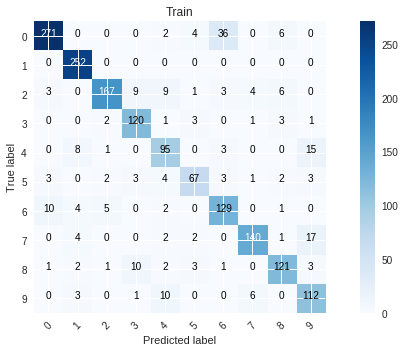

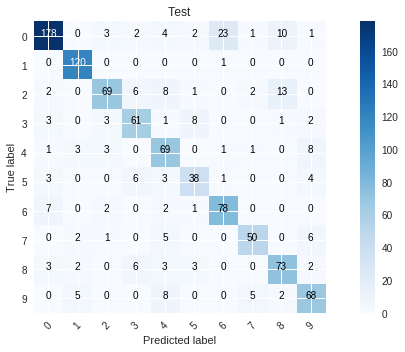

In [0]:
def neighbors(trainSet, testInst):
  dst = np.zeros(10)
  for i in range(10):
    dst[i] = np.linalg.norm(trainSet[i] - testInst)
  return dst

def kNearestNeighbors(trainSet, testInst):
  list = neighbors(trainSet, testInst)
  min = np.min(list)
  for label in range(10):
    if list[label] == min:
      return label

data_train = np.array(train_data)
pred_train = np.zeros(len(train_data[0]))

for i in range(len(train_data[0])):
  pred_train[i] = kNearestNeighbors(centroids, data_train[i,])

train_y_true = train_labels.values.flatten()
train_y_pred = pred_train.astype(int)

cnf_train = confusion_matrix(train_y_true, train_y_pred)
print("\n train:\n", cnf_train)

data_test = np.array(test_data)
pred_test = np.zeros(len(test_data[0]))

for i in range(len(test_data[0])):
  pred_test[i] = kNearestNeighbors(centroids, data_test[i,])

test_y_true = test_labels.values.flatten()
test_y_pred = pred_test.astype(int)

cnf_test = confusion_matrix(test_y_true, test_y_pred)
print("\n test:\n", cnf_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ["0", "1","2","3","4","5","6","7","8","9"]
plt.figure()
plot_confusion_matrix(cnf_train, classes=class_names, normalize=False, title="Train")
plt.figure()
plot_confusion_matrix(cnf_test, classes=class_names, normalize=False, title="Test")
plt.show()

## Task 3: Implement a Bayes Rule classiﬁer

## Task 4: Implement a multi-class perceptron algorithm

## Task 5: Implement the Gradient Descent Algorithm

## Notes